## Sales vs Ad

Show a Linear relation between the Amount spent by a company on Advertisment and Sales generted from it.

In [ ]:
# Imporing important Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as r


1. **OS** -> For Getting the stuffs related to the operating system.
1. **NumPy** -> For Dealing with numberical data and work fast in matrices form
1. **Pandas** -> Working with dataframes to orginise the data
1. **Matplotlib** -> For Plotting the Graphs and for visulisation purpose
1. **Request** -> Get the data form the site

In [ ]:
os.getcwd()

In [ ]:
# Getting the data from the site using request module
try :
    Response_Data = r.get('http://www.econometrics.com/intro/SALES.txt').text
except :
    print("Check Your Internet Connectivity.....")
    exit()
print(Response_Data)

In [ ]:
# Creating the DataFrame
lst = Response_Data.split('\n')
df = pd.DataFrame([x.strip().split("   ") for x in lst if len(x)!=0 ])
df

# Here we are seprating using "SPACES" we can use seprater when reading as a csv There we can put sep="\s+" -> One or more space

In [ ]:
# Coverting the dataframe Type
print(df.dtypes)
df = df.astype({ 0:float,  1:float })
print(df.dtypes)
print(df.shape)
df.head(4)

In [ ]:
# Renaming the Columns
df.columns = ["Sales", "Ad"]
df.head()

In [ ]:
df.describe()

### Plotting a Scatter Plot 

Now we will plot the Ad vs Sales Graph to check how much Advertising is required for getting a sale

X - axis -> Sales<br>
Y - axis -> Ad

In [ ]:
X_axis = df["Sales"].values
y_axis = df["Ad"].values

In [ ]:
# Reshapping the axes
print(X_axis.shape)
print(y_axis.shape)

# -1 -> Any number of Rows, 1 -> Only 1 Column
X_axis = X_axis.reshape(-1,1)
y_axis = y_axis.reshape(-1,1)

print(X_axis.shape)
print(y_axis.shape)

Here we are using reshape as the 1D Array is not Accepted by the Fit function it need 2D Array

In [ ]:
plt.scatter(X_axis, y_axis , color='b', label='Scatter Plot')
plt.title("Ad Vs Sales")
# Labeling the axes
plt.xlabel("Sales")
plt.ylabel("Ad")
plt.show()  # This is used to popup the graph but in jupyter it directly shows it

### Now Training Testing and predecting

#### Splitting the Dataset

Now we are splitting the data set to test and train portion

In [147]:
from sklearn.model_selection import train_test_split
import random

# Splitting the dataset
X_train , X_test, Y_train, Y_test = train_test_split(X_axis,y_axis, test_size=.3, random_state=random.randint(0,100))
# print(X_train , X_train.shape)
# print(X_test , X_test.shape)
# print(Y_train , Y_train.shape)
# print(Y_test , Y_test.shape)


Till here we have created the data for training purpose and now we have to crate a ML model and fit the data into it

#### Model Creation and Training

Here we will be going with the Linear Regression Model

In [148]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fitting the model
model.fit(X_train, Y_train)

y_prediction = model.predict(X_test)

In [149]:
# Checking the predictied Values
y_prediction

# Next are some random stuffs
type(y_prediction)
y_prediction.mean()

32.54683517824457

#### Creating Line graph for showing the predictied values

Text(0.5, 1.0, 'Ad Vs Sales')

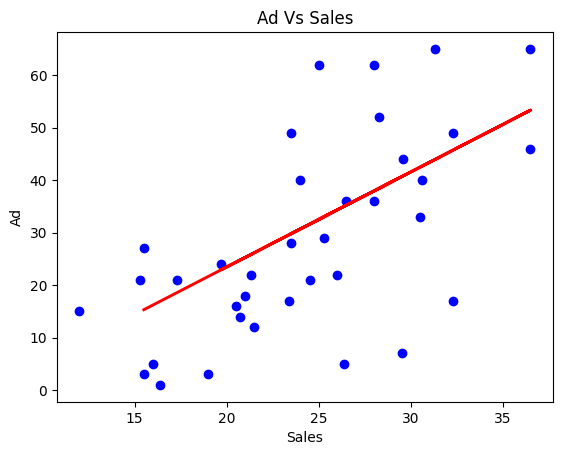

In [150]:
plt.scatter(X_axis,y_axis, color= 'b', label= 'Scatter Plot')
plt.plot(X_test,y_prediction, color='r', linewidth = 2.1, label = "Model Line")
plt.xlabel("Sales")
plt.ylabel("Ad")
plt.title("Ad Vs Sales")